# Assignment #3 - Neural Networks

### <font color="red"> DUE: Nov 12 (Tuesday) 11:00 pm </font>  

<font color="blue"> Sanika Suhas Pol</font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data
## Description of Data

<p style = 'text-align: justify;'><font>This dataset is about bike sharing system. Bike sharing system allow users to rent bikes for short trips. This data has count as the target label which gives us the number of bikes rented for that hour. There are other attributes like temperature and season which influence the number of bikes rented.  </font></p>

Following is the attribute description as given at the data source: 

|       Name   | Description                                                                | 
|:-------------|:----------------------------------------------------------------------------|
|instant       |Index
|dteday        |Date
|season        |Season : 1 = spring;  2 = summer;  3 = fall;  4 = winter
|mnth          |Month (1-12)
|holiday       |If day is holiday = 1; otherwise = 0
|weekday       |Day of week (0 -6)
|workingday    |If day is neither weekend or holiday = 1; otherwise = 0
|weathersit    |1 = Clear, few clouds, partly clouds;  2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist;  3 = light snow, light rain & Thunderstorm & scattered clouds, light rain;  4 = heavy rain & ice pellets  & thunderstorm & mist, snow & fog  
|temp          |Normalized temperature in celsius calculated as : (t-t_min)/(t_max-t_min) where t_min = -8 and t_max = +39
|atemp         |Normalized feeling temperature in celsius calculated as : (t-t_min)/(t_max-t_min) where t_min = -15 and t_max = +50
|humidity      |Normalized humidity
|windspeed     |Normalized windspeed
|casual        |Count of casual users
|registered    |Count of registered users
|cnt           |Count of total rental bikes

I got this data from the UCI machine learning repository. Following is the link where this data can be found.<br> 
<a href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a>

## Plots to visualize data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
df_r = pd.read_csv('hour.csv')
df_r.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


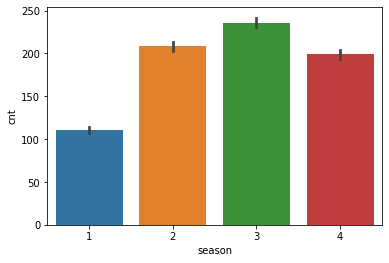

In [3]:
sns.barplot(x = 'season',y='cnt',data= df_r)

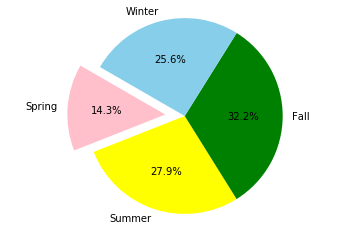

In [4]:
cnt_by_season = df_r.groupby(['season'])['cnt'].sum()
cnt_by_season

size = cnt_by_season
labels = 'Spring', 'Summer', 'Fall', 'Winter'
explode = (0.2, 0, 0, 0)  
colors = ['pink', 'yellow', 'green', 'skyblue']

plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle= 150 )
 
plt.axis('equal')
plt.show()

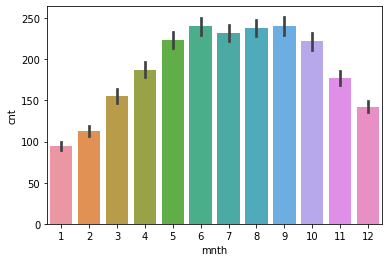

In [5]:
sns.barplot(x = 'mnth',y='cnt',data= df_r)

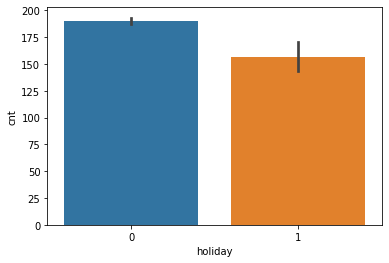

In [6]:
sns.barplot(x = 'holiday',y='cnt',data= df_r)

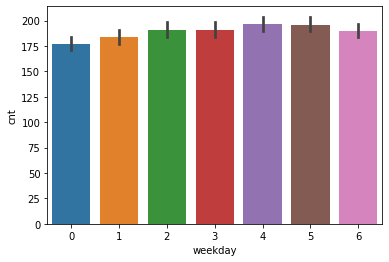

In [7]:
sns.barplot(x = 'weekday',y='cnt',data= df_r)

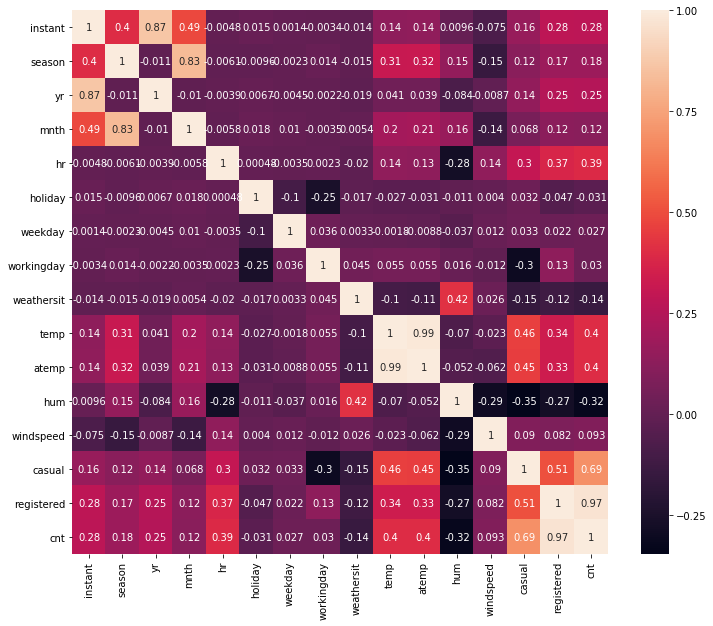

In [8]:
corr = df_r.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = corr, annot = True,cbar = True)

## Preliminary Observation

<p style = 'text-align: justify;'><font>I have plotted various graphs of the count of rented bikes vs different attributes and a heatmap. It is clear from the graphs that the count is dependent on several factors like temp, weather, season, month, hour. Out of these the most influencing attributes are temp and weather. Following are few graph-wise observations. <br>
<ul style="list-style-type:circle;">
    <li>People rent more bikes in Summer and Fall.</li>
    <li>Most bikes are rented between 7 am to 9 pm. It also shows that 5 pm to 7pm is the peak time to rent bikes.</li>
    <li>Highest number of bikes are rented when the weather is clear or partly cloudy. </li>
    <li>More bikes are rented during if the temperature is pleasant. For cold temperature the count of rental bile decreases.</li>
     <li>Number of bikes rented is large from months May to October compared to other months. </li>
    <li>The number of bikes rented on a weekday is more than the number of bikes rented on a weekend.</li>
    <li>More bikes are rented on a working day.</li>


## Preprocessing of the Data

<p style = 'text-align: justify;'><font>There are no null values in this dataset. The numerical values like temperature, humidity and windspeed are normalized. However, there are few attributes which are not very useful. For example, the columns causal and registered. The target label ‘cnt’ is the addition of ‘casual’ and ‘registered’. Since we already have the information of count, deleting the attributes 'casual' and 'registered'. The attributes instant and date are also not useful. So deleting those attributes as well.</font></p>

In [9]:
df_r=df_r.drop(['instant','dteday','casual','registered'],axis=1)

In [10]:
df_r.shape

(17379, 13)

# III. Methods
## III.A 5-fold Cross Validation

Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 
- Cross Validation is one of the technique used to test the effectiveness of a machine leaning model. It is also used as a resampling procedure to evalute model if data is limited.
- The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. Thus, the procedure is often called k-fold cross-validation. 
- When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation. I are implementing 5-fold cross-validation.
- Followinf is the procedure:
    1. Shuffle the dataset randomly.
    2. Split the dataset into k groups
    3. For each unique group:
        1. Take the group as a hold out or test data set
        2. Take the remaining groups as a training data set
        3. Fit a model on the training set and evaluate it on the test set
        4. Retain the evaluation score and discard the model
    4. Summarize the skill of the model using the sample of model evaluation scores
    
- Each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.
 

In [11]:
df1_r = df_r.drop(['cnt'],axis = 1)
X=df1_r.loc[:,['season','mnth','weathersit','temp','windspeed','hum']] 
T = df_r[['cnt']]

In [12]:
X.shape

(17379, 6)

In [13]:
T.shape

(17379, 1)

In [14]:
from nn import NeuralNet
def partition_c(data):
    lenOfPart = len(data) / 5.0
    mylist = []
    s = 0.0
    while s < len(data):
        mylist.append(data[int(s):int(s + lenOfPart)])
        s += lenOfPart
    return mylist

In [15]:
bestListOfParam=[]
finalList=[]
def cross_validatie_r(X, T, parameters):
    
    X_partitioned = partition_c(X)
    T_partitioned = partition_c(T)
    
    
    for i in range(5): 
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]
        history_rmse=[]
        params=[] 
        
        for k in range(5): 
            if i == k: 
                continue 
            
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]  
            
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            listOfParam=[]
            rmselist=[]
            
            for p in parameters:
                model_nn = NeuralNet(p)
                model_nn.train(X_train, T_train)
                pred = model_nn.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                listOfParam.append(p)
                
            history_rmse.append(min(rmselist))
            params.append(listOfParam[np.argmin(rmselist)])
         
       
        bestParam = listOfParam[np.argmin(history_rmse)]
        best_model_nn = NeuralNet(bestParam)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model_nn.train(X_train, T_train)

        final_pred = best_model_nn.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        finalList.append(final_err)
        bestListOfParam.append(bestParam)

    return finalList,bestListOfParam
    

In [16]:
models = [[6,3,1],[6,5,1],[6,7,1], [6,10,1], [6,12,1]]
bestAccuracy,bestParameters = cross_validatie_r(np.array(X), np.array(T), models)

/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to st

/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to st

/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to st

/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to st

In [17]:
print(bestAccuracy,bestParameters)

[117.47132892716718, 170.68583040274953, 128.38868877032294, 200.3837873797005, 207.35937166659852] [[6, 5, 1], [6, 3, 1], [6, 3, 1], [6, 3, 1], [6, 3, 1]]


- In the partition function, the data is split into 5 parts as I am using 5-fold cross-validation
- In the cross-validation function, the partition function is called to partition the input and target data. 
- Then a loop runs where each portion is treated as test data and rest of the data as training data.
- The function returns the best parameter list and best accuracy.


## III.B Nonlinear Regression 
### Summary of nonlinear regression

- Nonlinear regression is a regression in which the dependent or criterion variables are modeled as a non-linear function of model parameters and one or more independent variables. 
- Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function.
- Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression must generate a line (typically a curve) as if every value of Y was a random variable. 
- Nonlinear regression uses logarithmic functions, trigonometric functions, exponential functions, and other fitting methods.
- Nonlinear regression modeling is similar to linear regression modeling in that both seek to track a particular response from a set of variables graphically. Nonlinear models are more complicated than linear models to develop because the function is created through a series of approximations (iterations) that may stem from trial-and-error. 





**Use the NeuralNet class for regression to apply to your data.**

In [18]:
from sklearn import model_selection
X_train_r,X_test_r,y_train_r,y_test_r = model_selection.train_test_split(np.array(X),np.array(T),test_size=0.30,random_state=40)

In [19]:
nn = NeuralNet([6,3,1])
nn.train(X_train_r, y_train_r) 
Y_r_train = nn.use(X_train_r)
Y_r = nn.use(X_test_r)

/Users/sanikapol/Documents/ML/Assignments/3/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


In [20]:
Y_r

array([[ 65.51765256],
       [319.15188013],
       [266.29997216],
       ...,
       [118.42386736],
       [120.87475941],
       [301.43542255]])

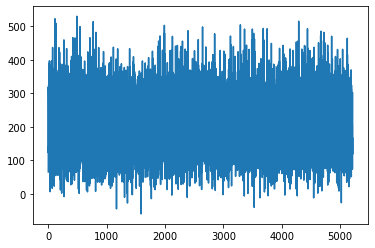

In [21]:
plt.plot(Y_r)

### Explanation of codes
- I have used the NeuralNet class and Standardizer provided by the professor.
- In the Standardizer class
    - The init function initializes mean and standard deviation
    - set_sigma function sets the standard deviation to zero
    - standardize function normalizes the data with mean and standard deviation. 
    - unstandardize function unstandardizes the input data.
- In the NeuralNet class
    - init funciton It inherits the same initialization class as NeuralNet
    - forward function inherits the same inialization class. 
    - object_f calculates the error by the log function. It also takes care of the the Y not being 0 by adding a small possible value(epsilon) to it because log of 0 is not defined.
    - train function preprocesses the inputs and then trains it. This function is also recursive function which calls itself. The target data that is being passed to this function is an indicator matrix which represents of the classes of the data in separate columns.
    - use funciotn applies the trained network to predict
- When Neural Net class is called, 3 parameters are passes.
    1. number of input features which are 6 in my case.
    2. Number of hidden neurons which are given 10 in  this case.
    3. Number of outputs which is one target variable of count in our case.

## III.C Nonlinear Logistic Regression

Summarize the nonlinear logistic regression model. 

- Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(xv) = P(T=k \mid xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

- By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
$$

- To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$

- We start from the error function below for the derivation bvefore:

$$
E(wv) = - \ln P(Tm \mid wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linearlogreg.png" width=450 />


### Summary:

<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm - Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $Tm$ is a matrix with indicator variable outputs, <br/>
and $Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

Finish the following NeuralNetLogReg class. 

In [22]:
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [23]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self,nunits)
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))  
    

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t,z = NeuralNet.forward(self,X)
        return self.softmax(t),z      

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon=1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(np.sum(T*np.log(Y+1e-9)))
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self,X,T)
        

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Xs = X
        classes, probabilities = self.forward(Xs)
        if self.stdT is None:
            classes = self.stdT.unstandardize(classes)
        Y = np.argmax(classes,1)
        return Y,classes


In [24]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

Check if your codes works well with toy synthetic data. 

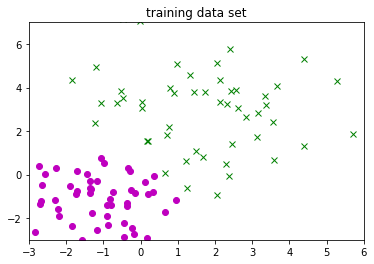

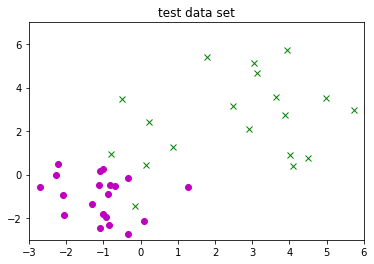

/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from grad import scg

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))


N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'om')
plt.plot(C2[:, 0], C2[:, 1], 'xg')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'om')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xg')
plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")
plt.show() 
net = NeuralNetLogReg([2,6,2])
for i in range(5):
    net.train(Xtrain,Ttrain)

In [26]:
y,classes = net.use(Xtest)

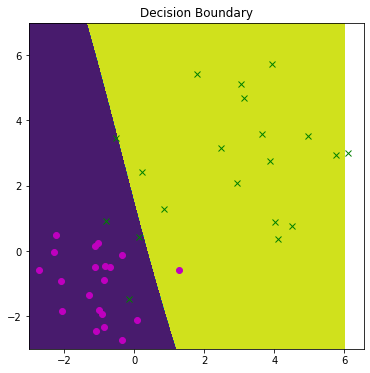

In [27]:
# show me the boundary
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)
xs, ys = np.meshgrid(x, y)
X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))
_,Classes = net.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(Ct1[:, 0], Ct1[:, 1], 'om')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xg')

plt.show()

Explain your codes (not in comment).

Apply to your classification data.

In [28]:
def normalize(X):
    return (X/X.max())

In [29]:
import pandas as pd
df_c = pd.read_csv('online_shoppers_intention.csv')

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_month = le.fit_transform(df_c['Month'])
label_visitorType = le.fit_transform(df_c['VisitorType'])
label_weekend = le.fit_transform(df_c['Weekend'])
label_revenue = le.fit_transform(df_c['Revenue'])

In [31]:
df_c.drop(['Month'],axis =1) 
df_c['Month'] = label_month
df_c.drop(['VisitorType'],axis =1) 
df_c['VisitorType'] = label_visitorType
df_c.drop(['Weekend'],axis =1) 
df_c['Weekend'] = label_weekend
df_c.drop(['Revenue'],axis =1) 
df_c['Revenue'] = label_revenue
df_c.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [32]:
df1_c = df_c.drop(['Revenue'],axis = 1)
X_c =df1_c [['ProductRelated','ProductRelated_Duration','Month','Region','TrafficType','VisitorType']]
T_c = df_c[['Revenue']]

In [33]:
X_c.shape

(12330, 6)

In [34]:
T_c.shape

(12330, 1)

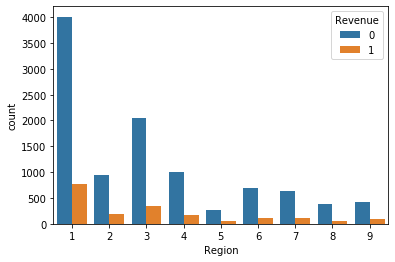

In [35]:
sns.countplot(x = 'Region' ,hue = 'Revenue',data = df_c) 

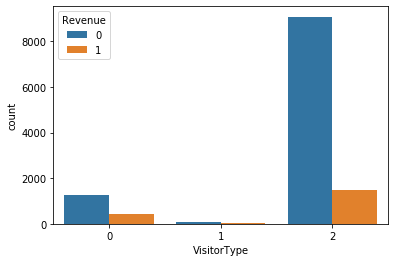

In [36]:
sns.countplot(x = "VisitorType" , hue = 'Revenue' ,data = df_c)

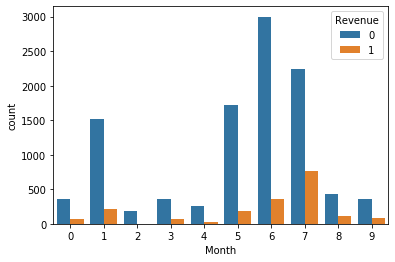

In [37]:
sns.countplot(x = 'Month', hue = 'Revenue' ,data = df_c)

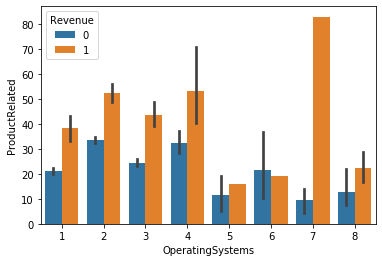

In [38]:
sns.barplot(x = 'OperatingSystems', y = 'ProductRelated' ,hue = 'Revenue',data = df_c) 

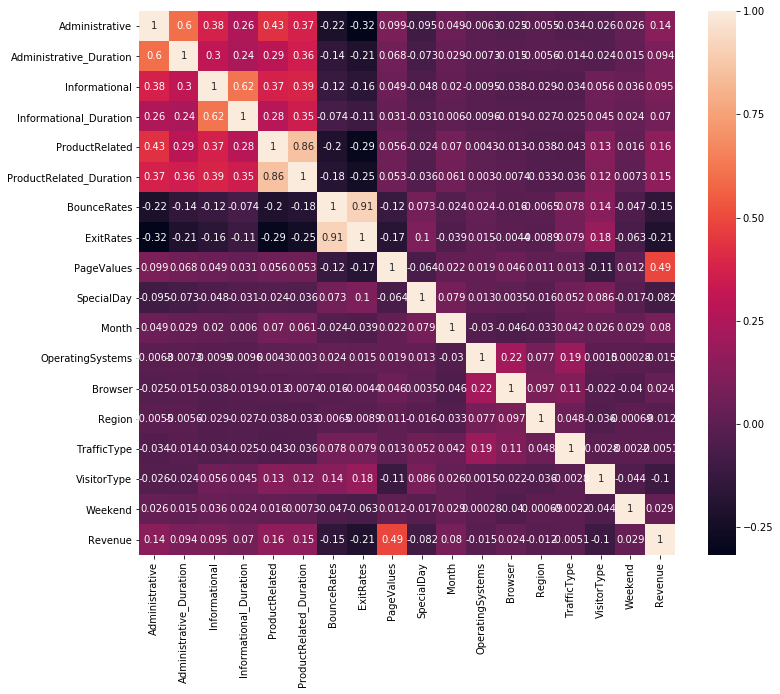

In [39]:
corr_c = df_c.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = corr_c, annot = True,cbar = True)

In [40]:
from sklearn import model_selection
X_Train_c, X_Test_c, Y_Train_c, Y_Test_c = model_selection.train_test_split(X_c, T_c,test_size=0.20,random_state=42)

In [41]:
print(X_Train_c.shape)
print(X_Test_c.shape)
print(Y_Train_c.shape)
print(Y_Test_c.shape)

(9864, 6)
(2466, 6)
(9864, 1)
(2466, 1)


In [42]:
T = add_ones(np.array(Y_Train_c).reshape(-1,1))
T=T.astype(int)
(T[:,0])[T[:,1]==1] = 0
print(T.shape)
nlreg = NeuralNetLogReg([6,3,2])

(9864, 2)


In [43]:
nlreg.train(X_Train_c, T, niter=1000) 
Y_c,Classes = nlreg.use((X_Test_c[0:400]))

/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [44]:
print(Y_c)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


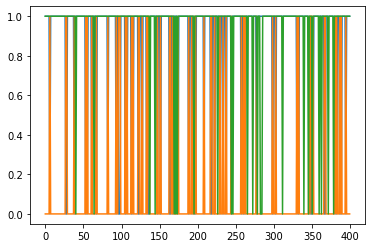

In [46]:
plt.plot(T[0:400])
plt.plot(Y_c)
plt.show()

Text(0.5, 1.0, 'Decision Boundary')

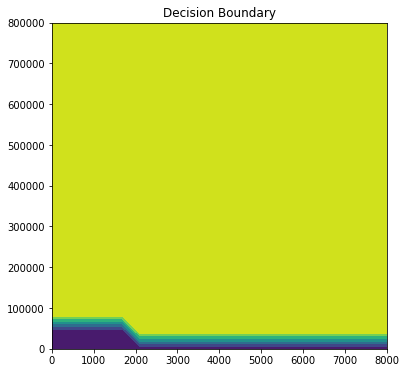

In [47]:
xs, ys = np.meshgrid(np.linspace(0,8000, 20), np.linspace(-1,800000, 20))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(Y_c>0).reshape(xs.shape)))
plt.title("Decision Boundary")

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

### Presentaion of CV results

In [48]:
def partition_c(s):
    average = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + average)])
        last += average
    return out

In [49]:
finalList=[]
bestListofParameters=[]
def cross_validate_c(X, T, parameters):
    
    Xpartitioned = partition_c(X)
    Tpartitioned = partition_c(T)
    
    for test in range(5): 
        Xtest = Xpartitioned[test]
        Ttest = Tpartitioned[test]
        j = 0
        
        history_rmse=[]
        params=[]
        
        for val in range(5): 
            if test == val: continue
            
            Xval = Xpartitioned[val]
            Tval = Tpartitioned[val]
            
            Xtrain = Xpartitioned[not test and not val]
            Ttrain = Tpartitioned[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            
            for param in parameters:
                
                model_lreg = NeuralNetLogReg(param)
                model_lreg.train(Xtrain, Ttrain)
                predictions,probabilities = model_lreg.use(Xval)
                
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, predictions)
                flist.append(valAcc)
                paramlist.append(param)
            
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        
        bestParam = params[np.argmax(history_rmse)]
        bestModelLreg = NeuralNetLogReg(bestParam)
        
        Xtrain = Xpartitioned[not test]
        Ttrain = Tpartitioned[not test]
        bestModelLreg.train(Xtrain, Ttrain)

        finalPredictions,probabilities = bestModelLreg.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        
        f1_c = f1_score(Ttest1, finalPredictions)
        finalList.append(f1_c)
        bestListofParameters.append(bestParam)

    return finalList,bestListofParameters

In [50]:
models_c = [[6,3,2],[6,5,2],[6,7,2], [6,10,2], [6,12,2]]
print(X_Train_c.shape)
print(T.shape)
bestAccuracy,bestParameters = cross_validate_c(np.array(X_Train_c), T, models_c)

(9864, 6)
(9864, 2)


/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/sanikapol/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
print(bestAccuracy,bestParameters)

[0.25485765928603704, 0.15147058823529413, 0.26821636119803305, 0.29287090558766865, 0.2802197802197802] [[6, 12, 2], [6, 3, 2], [6, 12, 2], [6, 12, 2], [6, 7, 2]]


In [52]:
nlreg = NeuralNetLogReg([6,5,2])
nlreg.train(X_Train_c, T, niter=1000) 
Y,Classes = nlreg.use((X_Test_c[0:400]))

### Discussions about parameter/network structure choice

- It takes a lot of time to run the training function. So with trial and error, I have set the number of iterations to 1000 which is an optimized value.
- Taking all the features for cross validation takes a lot of time to train so I reduced it to just important features in the dataset.
- I have selected input units 6 for non liner regression because I have 6 important features selected from my dataset after preprocessing.
- Output layer contains just one unit as I just had one target variable.
- So there are 3 Layers with 6 neurons in the first layer, 3(from cross-vaidation) in the second and 1 in the 3rd layer.
- I have selected input units 6 for non liner logistic regression  because I have 6 important features selected from my dataset after preprocessing.
- For logistic regression, output layer contains 2 units as there are two output classes.
- So there are 3 Layers with 6 neurons in the first layer, 3(from cross-vaidation) in the second and 2 units in the 3rd layer.

### Plots for results
**Plots for non linear regression after cross-validation**

In [61]:
from sklearn.metrics import r2_score,accuracy_score
print('RMSE:', np.sqrt(mean_squared_error(y_test_r, Y_r)))
print('R squared value:', r2_score(y_test_r, Y_r))

RMSE: 149.1271878168386
R squared value: 0.3186136515528539


Text(0, 0.5, 'Residuals')

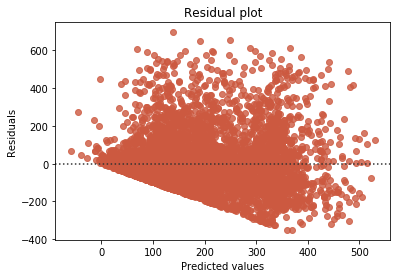

In [54]:
sns.residplot(Y_r.flatten(), y_test_r.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

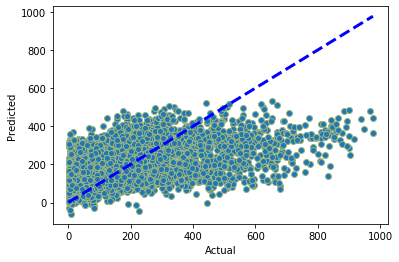

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test_r, Y_r, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

**Plots for non Logistic Regression after cross-validation**

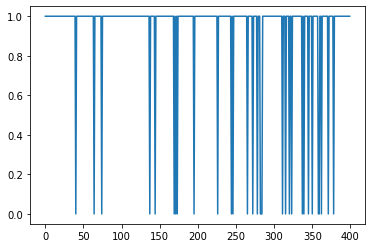

In [63]:
plt.plot(Y)
plt.show()

Text(0.5, 1.0, 'Decision Boundary')

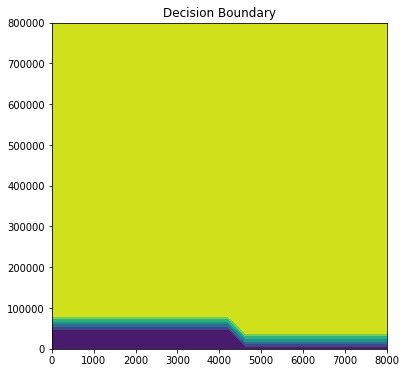

In [57]:
xs, ys = np.meshgrid(np.linspace(0,8000, 20), np.linspace(-1,800000, 20))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(Y>0).reshape(xs.shape)))
plt.title("Decision Boundary")

Accuracy:  Revenue    20.5
dtype: float64 %


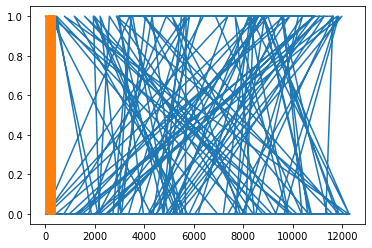

In [58]:
Y_c = Y_c.reshape(-1,1)
plt.plot(Y_Test_c[0:400])
plt.plot(Y_c)

print("Accuracy: ", 100 - np.mean(np.abs(Y_Test_c[0:400] - Y_c)) * 100, "%")

### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

- The Nonlinear Regression tries to learn the weights of the features which can be used to understand the distribution of the data and thus learn the shape of data with respect to the target variable.
- The accuracy of the training is based on number of parameters in case of neural networks. 
- These are number of neurons and number of layers  to run the train function. 
- The optimal performance of the model depends upon these parameters too. 


# Conclusions

- Initially it was very difficult to understand what exactly was expected from us in the assignment.
- Understanding the NeuralNet class functions was a bit challenging 
- Learning was fun for this assignment.

# References

1. UCI Machine Learning Repository: Bike Sharing Dataset Data Set, https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset Sharing Dataset.
2. UCI Machine Learning Repository: Online Shoppers Purchasing Intention Dataset Data Set, https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset Shoppers Purchasing Intention Dataset.
3. Sakar, C. Okan, et al. “Real-Time Prediction of Online Shoppers' Purchasing Intention Using Multilayer Perceptron and LSTM Recurrent Neural Networks.” SpringerLink, Springer London, 9 May 2018, https://link.springer.com/article/10.1007/s00521-018-3523-0.
4. Brownlee, Jason. “A Gentle Introduction to k-Fold Cross-Validation.” Machine Learning Mastery, 8 Aug. 2019, https://machinelearningmastery.com/k-fold-cross-validation/.
5. Kenton, Will. “What Is Nonlinear Regression?” Investopedia, Investopedia, 27 Aug. 2019, https://www.investopedia.com/terms/n/nonlinear-regression.asp.
6. “Powerful Python Data Analysis Toolkit.” Pandas, https://pandas.pydata.org/pandas-docs/stable/.
7. “Overview.” Overview - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/contents.html.
8. “HTML5 Tutorial.” HTML Tutorial, https://www.w3schools.com/html/default.asp.
9. “Markdown.” / Wiki / Markdown Syntax, https://sourceforge.net/p/jupiter/wiki/markdown_syntax/.
10. “Statistical Data Visualization¶.” Seaborn, https://seaborn.pydata.org/index.html.
11. "Neural Network Notes", https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.sol.ipynb
12 "Linear Classification Notes", https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb



# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
